## Explorative Datenanalyse

In diesem Notebook wird eine explorative Datenanalyse durchgeführt, um die Struktur und die wichtigsten Merkmale des Datensatzes zu verstehen.  
Die Bereinigung der Daten wird in dem Notebook "Cleaning.ipynb" durchgeführt, deshalb wird hier direkt mit den bereinigten Daten gearbeitet.  
Es wird hauptsächlich mit Visualisierungsmethoden wie unterschiedlichen Diagrammen gearbeitet, um die Daten übersichtlich darzustellen. Außerdem werden Methoden der deskriptiven Statistik verwendet, um festzustellen, ob bestimmte Korrelationen und Muster (z. B. der Zusammenhang zwischen einem erhöhten Cholesterinwert und einer Erkrankung) in den Daten von statistischer Signifikanz sind oder auch auf zufällige Variationen zurückgeführt werden können.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/dataset_cleaned.csv')
df['sex'] = df['sex'].replace({0: 'female', 1: 'male'})

# extract all columns except 'goal' --> X
X = df.loc[:, df.columns != 'goal']
# extract only the column 'goal' --> y
y = df.loc[:, 'goal']

df.head()

age     sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0   63    male   1       145   233    1        2      150      0      2.3   
1   67    male   4       160   286    0        2      108      1      1.5   
2   67    male   4       120   229    0        2      129      1      2.6   
3   37    male   3       130   250    0        0      187      0      3.5   
4   41  female   2       130   204    0        2      172      0      1.4   

   slope   ca  thal  goal  
0      3  0.0   6.0     0  
1      2  3.0   3.0     1  
2      2  2.0   7.0     1  
3      3  0.0   3.0     0  
4      1  0.0   3.0     0

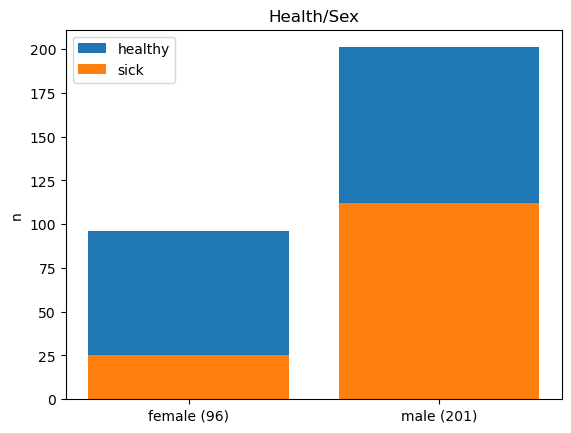

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

counts_male = sum(X['sex'] == 'male')
counts_female = sum(X['sex'] == 'female')

counts_male_sick = sum(np.all([X['sex'] == 'male',
                              y > 0], axis=0))
counts_female_sick = sum(np.all([X['sex'] == 'female',
                              y > 0], axis=0))

plt.bar([1, 0], [counts_male, counts_female])
plt.bar([1, 0], [counts_male_sick, counts_female_sick])
plt.xticks([1, 0],[f'male ({counts_male})', f'female ({counts_female})'])
plt.ylabel('n')
plt.title('Health/Sex')
plt.legend(['healthy', 'sick'])
plt.show()

Der obige Plot zeigt die Anzahl der kranken / gesunden Probanden aufgeteilt nach dem Geschlecht. 
Es gibt etwa doppelt so viele männliche Probanden wie weibliche, von denen ca. die Hälfte an einer Herzerkreislauf-Erkrankung leiden.
Bei den Frauen sind lediglich 1/4 erkrankt.

C:\Users\maxwi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


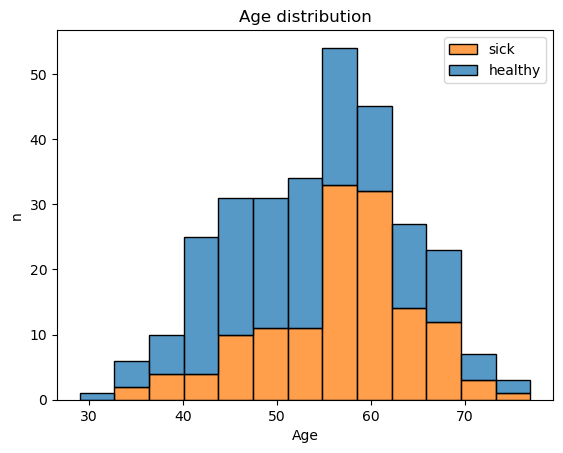

In [3]:
sns.histplot(data=df, x='age', hue='goal', multiple='stack')
plt.xlabel('Age')
plt.ylabel('n')
plt.title('Age distribution')
plt.legend(['sick', 'healthy'])
plt.show()

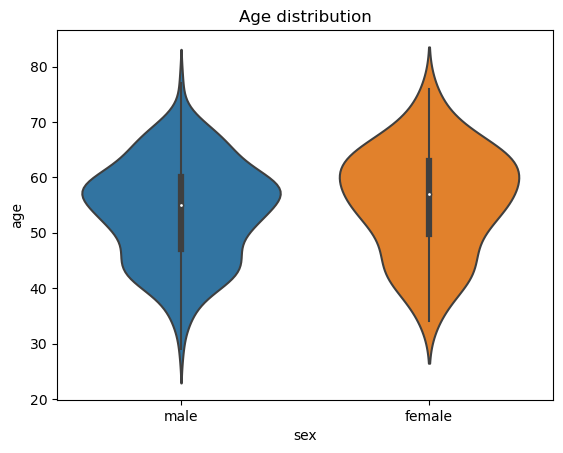

In [4]:
ax = sns.violinplot(X, x='sex', y='age')
ax.set_xticklabels(['male', 'female'])
plt.title('Age distribution')
plt.show()

C:\Users\maxwi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


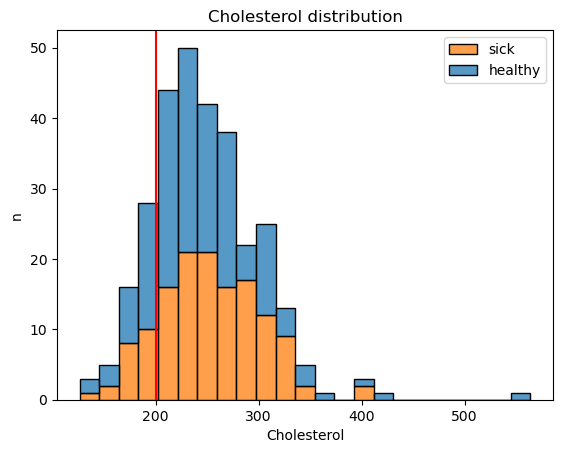

In [5]:
sns.histplot(data=df, x='chol', hue='goal', multiple='stack')
plt.xlabel('Cholesterol')
plt.ylabel('n')
plt.title('Cholesterol distribution')
plt.legend(['sick', 'healthy'])

upper_limit_chol = 200
plt.axvline(x=upper_limit_chol, color='red')
plt.show()

Der Plot zeigt die Cholesterinverteilung der kranken und gesunden Probanden. Deutlich zu erkennen ist, dass die meisten Probanden einen erhöhten Cholesterinwert (>200) aufweisen.

C:\Users\maxwi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


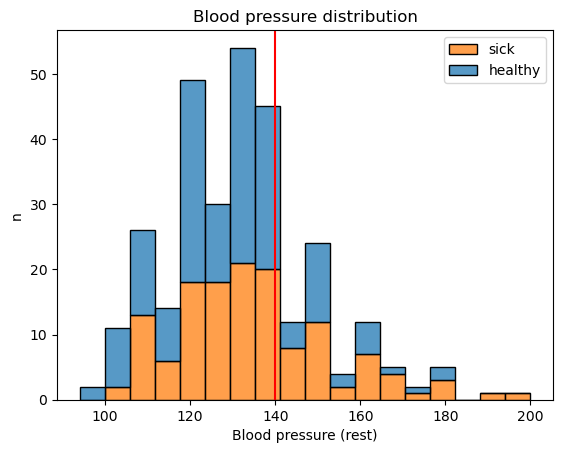

In [6]:
sns.histplot(data=df, x='trestbps', hue='goal', multiple='stack')
plt.xlabel('Blood pressure (rest)')
plt.ylabel('n')
plt.title('Blood pressure distribution')
plt.legend(['sick', 'healthy'])

upper_limit_bp = 140
plt.axvline(x=upper_limit_bp, color='red')
plt.show()

Wie in der Grafik zu erkennen, haben die meisten Probanden einen unauffälligen Blutdruck von unter 140mmHg (systolisch). 
Bei den Probanden mit Hypertonus (>140mmHg) ist die relative Häufigkeit an Herzkreislauferkrankungen deutlich erhöht.

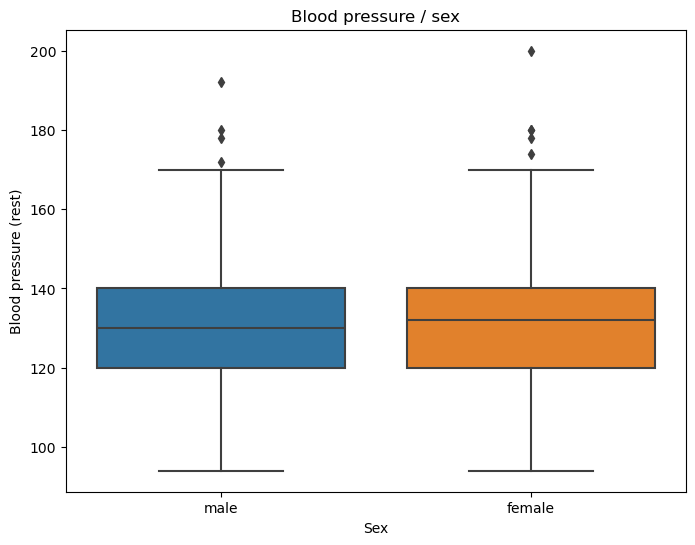

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='trestbps', data=df)
plt.title('Blood pressure / sex')
plt.xlabel('Sex')
plt.ylabel('Blood pressure (rest)')
plt.show()

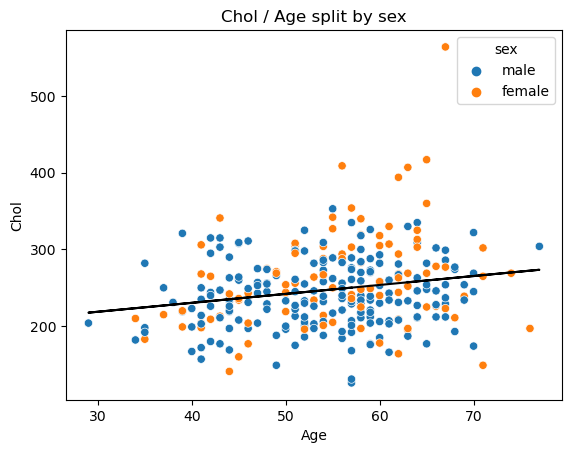

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
x = np.array(X['age'])
x = x[:, np.newaxis]
reg = model.fit(x, X['chol'])
pred = reg.predict(x)

sns.scatterplot(X, x='age', y='chol', hue='sex')
plt.plot(x, pred, color='black')
plt.xlabel('Age')
plt.ylabel('Chol')
plt.title('Chol / Age split by sex')
plt.show()

Diese Grafik zeigt das Alter der Probanden im Verhältnis zu ihrem Cholesteringehalt aufgeteilt nach dem Geschlecht.
Deutlich zu erkennen ist der Anstieg von Cholesterin bei zunehmenden Alter.

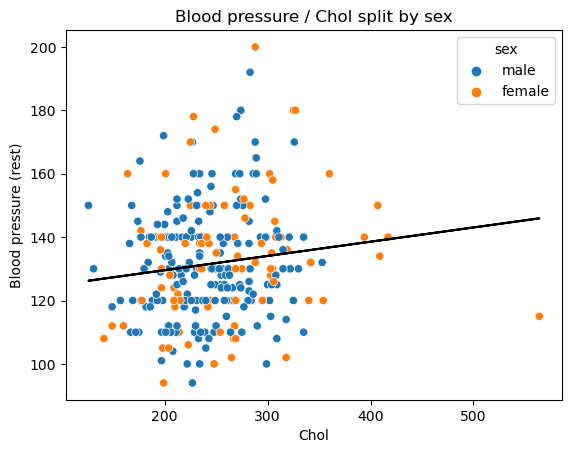

In [18]:
model = LinearRegression()
x = np.array(X['chol'])
x = x[:, np.newaxis]
reg = model.fit(x, X['trestbps'])
pred = reg.predict(x)

sns.scatterplot(X, x='chol', y='trestbps', hue='sex')
plt.plot(x, pred, color='black')
plt.xlabel('Chol')
plt.ylabel('Blood pressure (rest)')
plt.title('Blood pressure / Chol split by sex')
plt.show()

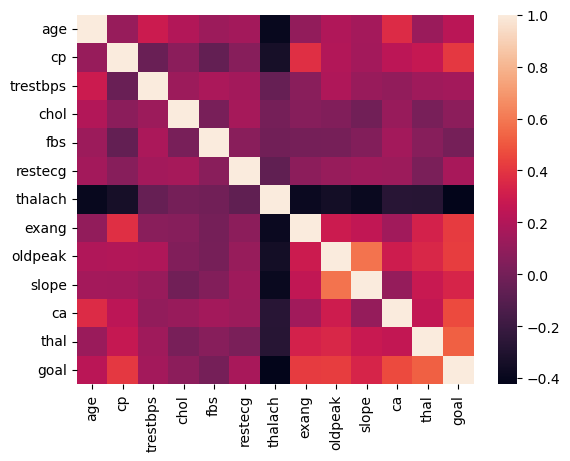

In [10]:
corr = df.loc[:,df.columns!='sex'].corr()

sns.heatmap(corr)
plt.show()

#### Cholesterinwerte im Vergleich Frauen/Männer

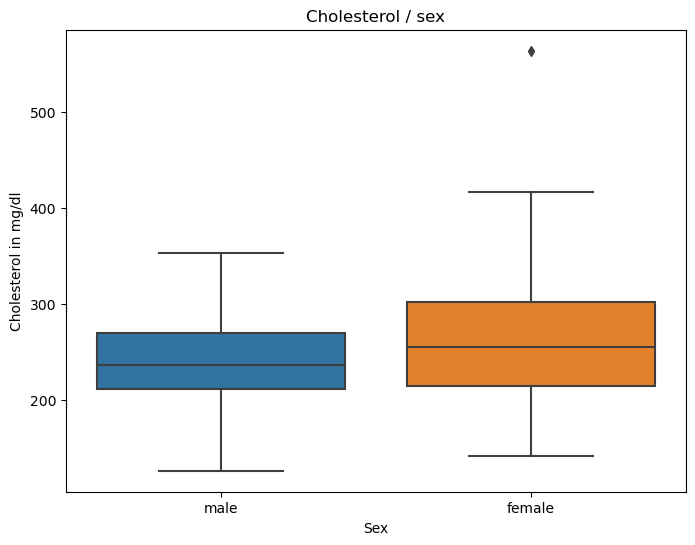

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='chol', data=df)
plt.title('Cholesterol / sex')
plt.xlabel('Sex')
plt.ylabel('Cholesterol in mg/dl')
plt.show()

In [12]:
# confidence interval (95%) for cholesterol level of men/women
from scipy import stats

# filter by gender and calculate interval
conf_level = 0.95
chol_men = df.loc[df['sex'] == 'male', 'chol']
chol_women = df.loc[df['sex'] == 'female', 'chol']
conf_int_men = stats.t.interval(conf_level, len(chol_men) - 1, loc=chol_men.mean(), scale=stats.sem(chol_men))
conf_int_women = stats.t.interval(conf_level, len(chol_women) - 1, loc=chol_women.mean(), scale=stats.sem(chol_women))

result_table_men_vs_women = pd.DataFrame({
    'Geschlecht': ['Männer', 'Frauen'],
    'Untere Grenze': [conf_int_men[0], conf_int_women[0]],
    'Obere Grenze': [conf_int_men[1], conf_int_women[1]]
})

print(result_table_men_vs_women)

  Geschlecht  Untere Grenze  Obere Grenze
0     Männer     234.288517    246.199046
1     Frauen     249.044612    275.413721


Das 95%-Konfidenzintervall bedeutet, dass der wahre Mittelwert des Cholesterinspiegels mit 95%iger Wahrscheinlichkeit in den angegebenen Intervallen liegt.  
Da sich die Intervalle für Männer und Frauen nicht überlappen, deutet dies auf einen signifikanten Unterschied im durchschnittlichen Cholesterinspiegel zwischen Männern und Frauen hin.

#### Cholesterin im Vergleich zur Erkrankung

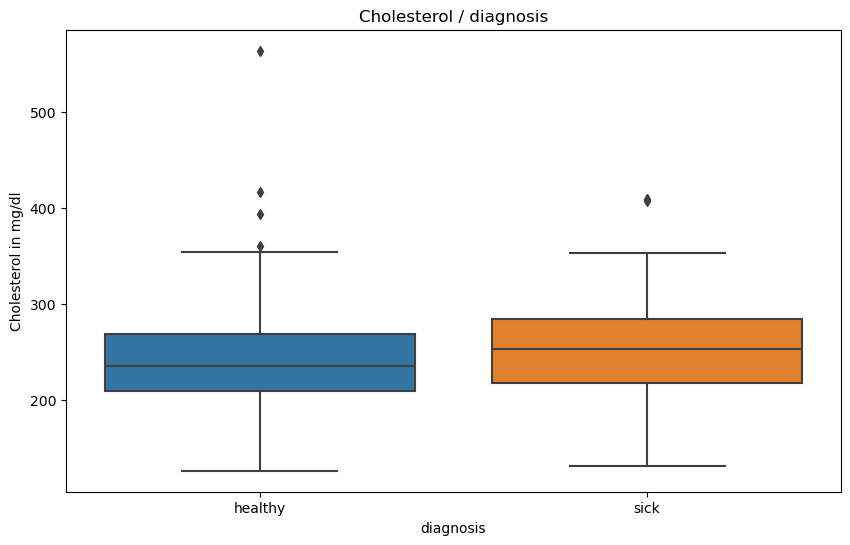

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='goal', y='chol', data=df)
plt.title('Cholesterol / diagnosis')
plt.xlabel('diagnosis')
plt.ylabel('Cholesterol in mg/dl')
plt.xticks([0, 1], ['healthy', 'sick'])
plt.show()

Im folgenden wird ein t-Test durchgeführt, um zu analysieren, ob der Cholesterinwert bei erkrankten Personen höher ist als bei gesunden.  
Hierfür wurden folgende Hypothesen aufgestellt:  
- Nullhypothese (HO): Cholesterinwert bei erkrankten Personen ist gleich wie oder kleiner als bei gesunden.
- Alternativhypothese (H1): Cholesterinwert bei erkrankten Personen ist höher als bei gesunden.

In [14]:
# t-test
from scipy.stats import ttest_ind

chol_healthy = df.loc[df['goal'] == 0, 'chol']
chol_sick = df.loc[df['goal'] == 1, 'chol']

t_statistic, p_value = ttest_ind(chol_sick, chol_healthy, alternative='greater')

print("t-Statistik:", t_statistic)
print("p-Wert:", p_value)

t-Statistik: 1.3834015443480652
p-Wert: 0.08379388357371184


Die t-Statistik sagt aus, dass der Mittelwert des Cholesterinspiegels in der erkrankten Gruppe um ca. 1,38 Standardabweichungen höher ist, als der Mittelwert in der gesunden Gruppe. Der Wert ist allerdings kein Maß dafür, ob der Unterschied statistisch signifikant ist. Hierfür muss der p-Wert betrachtet werden, der aussagt, ob der beobachtete Unterschied zwischen den Gruppen auf rein zufällige Variationen zurückgeführt werden könnte.  
Der p-Wert ist größer als 0.05, daher wird die Nullhypothese nicht abgelehnt.  
Es gibt keine signifikanten Hinweise darauf, dass der Cholesterinwert bei kranken Personen höher ist als bei gesunden.

#### Systolischer Ruheblutdruck

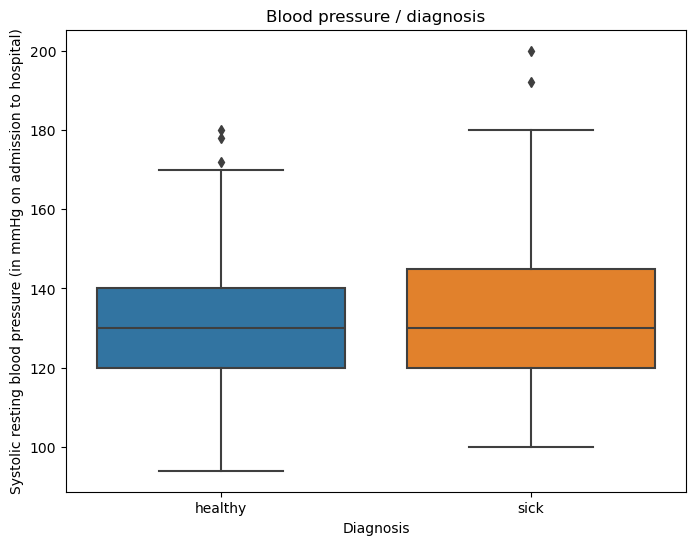

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='goal', y='trestbps', data=df)
plt.title('Blood pressure / diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Systolic resting blood pressure (in mmHg on admission to hospital)')
plt.xticks([0, 1], ['healthy', 'sick'])
plt.show()

In [16]:
# confidence interval (95%) for blood pressure and diagnosis

# filter by diagnosis and calculate interval
conf_level = 0.95
blutdruck_gesund = df.loc[df['goal'] == 0, 'trestbps']
blutdruck_krank = df.loc[df['goal'] == 1, 'trestbps']
conf_int_gesund = stats.t.interval(conf_level, len(blutdruck_gesund) - 1, loc=blutdruck_gesund.mean(), scale=stats.sem(blutdruck_gesund))
conf_int_krank = stats.t.interval(conf_level, len(blutdruck_krank) - 1, loc=blutdruck_krank.mean(), scale=stats.sem(blutdruck_krank))

result_table_blutdruck = pd.DataFrame({
    'Diagnose': ['Gesund', 'Krank'],
    'Untere Grenze': [conf_int_gesund[0], conf_int_krank[0]],
    'Obere Grenze': [conf_int_gesund[1], conf_int_krank[1]]
})

print(result_table_blutdruck)

  Diagnose  Untere Grenze  Obere Grenze
0   Gesund     126.618412    131.731588
1    Krank     131.442350    137.827723


Die Intervalle überlappen sich nur minimal, deshalb kann hier keine klare Aussage getroffen werden, ob es einen statistisch signifikanten Unterschied zwischen den beiden Gruppen gibt. Um eine klarere Aussage treffen zu können, wird zusätzlich ein t-Test durchgeführt.  
Im Folgenden wird ein t-Test durchgeführt, um zu analysieren, ob der Cholesterinwert bei erkrankten Personen höher ist als bei gesunden.
Hierfür wurden folgende Hypothesen aufgestellt:

Nullhypothese (HO): Der Blutdruck von erkrankten Personen ist niedriger oder gleich wie der von gesunden.  
Alternativhypothese (H1): Der Blutdruck von erkrankten Personen ist höher als der von gesunden.

In [17]:
# t-Test
blutdruck_healthy = df.loc[df['goal'] == 0, 'trestbps']
blutdruck_sick = df.loc[df['goal'] == 1, 'trestbps']

# Durchführung des t-Tests
t_statistic, p_value = ttest_ind(blutdruck_sick, blutdruck_healthy, alternative='greater')

print("t-Statistik:", t_statistic)
print("p-Wert:", p_value)

t-Statistik: 2.6678917570482685
p-Wert: 0.004027398179437639


Die t-Statistik besagt, dass der Mittelwert der erkrankten Personen um ca. 2,67 Standardabweichung von dem der gesunden Personen abweicht.  
Der p-Wert ist kleiner als 0.05, daher wird die Nullhypothese abgelehnt.
Es gibt signifikante Hinweise darauf, dass der Blutdruck bei kranken Personen höher ist als bei gesunden Personen.